# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [458]:
# Import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [460]:
# Import the libraries you will be using for analysis
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [462]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [464]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [468]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data
# there was an issue with import os - every time it was getting hanged and bcause of that I had to restart kernel. 
# Sample and combine
# Removed os and read file one by one pd.read_parquet(file)
import glob
file_pattern = "D:\\technology\\Diploma\\upgrad\\course\\SQL-And-Statistics-Essentials\\EDA-Assignment\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\*.parquet"

parquet_files = glob.glob(file_pattern)

sampled_df_list = []

for file in parquet_files:
    # Load the data from the current Parquet file
    df = pd.read_parquet(file)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    #filter 2023
    df = df[df['tpep_pickup_datetime'].dt.year == 2023]
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    # 5% on Data by Date and Hour
    sampled_df = df.groupby(['pickup_date', 'pickup_hour']).apply(lambda x: x.sample(frac=0.05))
    sampled_df = sampled_df.reset_index(drop=True)
    sampled_df_list.append(sampled_df)

final_sampled_df = pd.concat(sampled_df_list, ignore_index=True)

final_sampled_df.shape

(1896399, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [470]:
# Store the df in csv/parquet
# df.to_parquet('')
# Store the df in csv/parquet
#final_sampled_df.to_parquet('/content/drive/MyDrive/sampled_taxi_data.parquet') 
# or
final_sampled_df.to_csv('D:\\technology\\Diploma\\upgrad\\course\\SQL-And-Statistics-Essentials\\EDA-Assignment\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\sampled_taxi_data.csv', index=False) 

print("Sampled data saved successfully.")

Sampled data saved successfully.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [472]:
# Load the new data file
path = 'D:\\technology\\Diploma\\upgrad\\course\\SQL-And-Statistics-Essentials\\EDA-Assignment\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\sampled_taxi_data.csv'
df = pd.read_csv(path)

In [34]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:46:51   2023-01-01 00:55:25              1.0   
1         2  2023-01-01 00:55:30   2023-01-01 01:04:35              1.0   
2         2  2023-01-01 00:42:43   2023-01-01 00:44:50              NaN   
3         2  2023-01-01 00:09:36   2023-01-01 00:14:07              1.0   
4         2  2023-01-01 00:47:20   2023-01-01 01:06:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.70         1.0                  N           144            90   
1           1.57         1.0                  N           263           162   
2           0.14         NaN                NaN           148           148   
3           0.53         1.0                  N           164           164   
4           3.86         1.0                  N           244           136   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5         3.1           0.0   
1             1  ...      0.5         3.0           0.0   
2             0  ...      0.5         0.0           0.0   
3             1  ...      0.5         0.0           0.0   
4             2  ...      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.80                   2.5          0.0   
1                    1.0         18.00                   2.5          0.0   
2                    1.0         26.59                   NaN          NaN   
3                    1.0         10.80                   2.5          0.0   
4                    1.0         26.50                   0.0          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [478]:
# fix datatype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [480]:
# Fix the index and drop any columns that are not needed
df = df.drop(columns=['store_and_fwd_flag'])
df = df.reset_index(drop=True)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_date           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns
# Merge columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df = df.drop(columns=['Airport_fee'])


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [484]:
# check where values of fare amount are negative
#Lets collect int and float columns which directly or indirectly impact fare amount. 
#int and float cols
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# negative values
negative_cols = df[numeric_cols].apply(lambda x: (x < 0).any())
# col with negative val
negative_cols = negative_cols[negative_cols == True].index.tolist()
print(f"fare amount are negative for : {negative_cols}")
#Ans: extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge',airport_fee these columns are fare amount which has negative

fare amount are negative for : ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


Did you notice something different in the `RatecodeID` column for above records?

In [486]:
# Analyse RatecodeID for the negative fare amounts
#df['fare_amount'].value_counts() - this does not show any negative amount. However total_amount is negative.
#total_amount 
negative_amount_df = df[df['total_amount'] < 0]
# RatecodeID distribution for negative total_amount
ratecode_analysis = negative_amount_df['RatecodeID'].value_counts().reset_index()
ratecode_analysis.columns = ['RatecodeID', 'Count']
print(ratecode_analysis)


   RatecodeID  Count
0         1.0     54
1         2.0     22
2         5.0      8
3         3.0      4


In [488]:
# Find which columns have negative values
#int and float cols
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# negative values
negative_cols = df[numeric_cols].apply(lambda x: (x < 0).any())
# col with negative val
negative_cols = negative_cols[negative_cols == True].index.tolist()
print(f"fare amount are negative for : {negative_cols}")
#Ans: extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', airport_fee these columns are fare amount which has negative


fare amount are negative for : ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


In [490]:
# fix these negative values
df['total_amount'] = df['total_amount'].apply(lambda x: 0 if x < 0 else x)
df['extra'] = df['extra'].apply(lambda x: 0 if x < 0 else x)
df['improvement_surcharge'] = df['improvement_surcharge'].apply(lambda x: 0 if x < 0 else x)
df['congestion_surcharge'] = df['congestion_surcharge'].apply(lambda x: 0 if x < 0 else x)
df['mta_tax'] = df['mta_tax'].apply(lambda x: 0 if x < 0 else x)
df['airport_fee'] = df['airport_fee'].apply(lambda x: 0 if x < 0 else x)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [492]:
# Find the proportion of missing values in each column
# percent of missing proportion
missing_proportion = 100*df.isnull().mean()
print(missing_proportion)

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.423594
trip_distance             0.000000
RatecodeID                3.423594
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.423594
airport_fee              92.172164
pickup_date               0.000000
pickup_hour               0.000000
Airport_fee              11.251430
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [494]:
# Display the rows with null values
num_of_rows_missing_values = df.isnull().sum()
print(num_of_rows_missing_values)

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64925
trip_distance                  0
RatecodeID                 64925
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64925
airport_fee              1747952
pickup_date                    0
pickup_hour                    0
Airport_fee               213372
dtype: int64


In [466]:
# Impute NaN values in 'passenger_count'
#passenger_count median and mode
#psngr_count_mean = df['passenger_count'].mean()
#psngr_count_median = df['passenger_count'].median()
#print(f"Mean of passenger_count: {psngr_count_mean}")
#print(f"Median of passenger_count: {psngr_count_median}")
#df['passenger_count'] = df['passenger_count'].fillna(psngr_count_median) # Imputation
df['passenger_count'] = df['passenger_count'].fillna(0)
print("Empty row values for passenger_count: ")
missing_passenger_count_df = df[df['passenger_count'].isnull()]
print(missing_passenger_count_df.shape)

Empty row values for passenger_count: 
(0, 19)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [37]:
# Fix missing values in 'RatecodeID'
#RatecodeID
df['RatecodeID'].value_counts()
RcdID_mode=df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(RcdID_mode)
print(100*df.isnull().mean())

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.435195
airport_fee              3.435195
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [39]:
# handle null values in congestion_surcharge
#df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

#df['congestion_surcharge'].value_counts()
congestion_surcharge_mode=df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge_mode)
print(100*df.isnull().mean())

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              3.435195
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [41]:
# Handle any remaining missing values
#airport_fee in hvng NAN
df['airport_fee'] = df['airport_fee'].fillna(0)
print(100*df.isnull().mean())

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

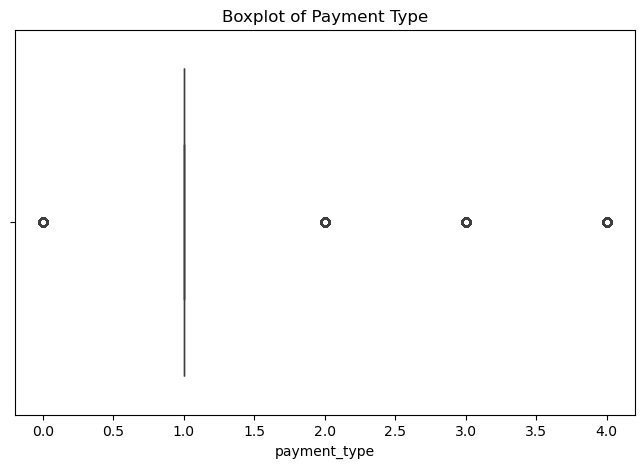

In [496]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
#sns.histplot(x=df['passenger_count'], bins=[0,1,2,3,4,5,6,7,8])
#plt.show()
#Data description:
# VendorId: pricing across different vendors
# tpep_pickup_datetime: trip pickup time
# tpep_dropoff_datetime: trip drop time
#passenger_count: no of passenger
# The data is about the taxi trip in NYC regions.
#payment type
plt.figure(figsize=(8, 5))
sns.boxplot(x='payment_type', data=df)
plt.title('Boxplot of Payment Type')
plt.show()


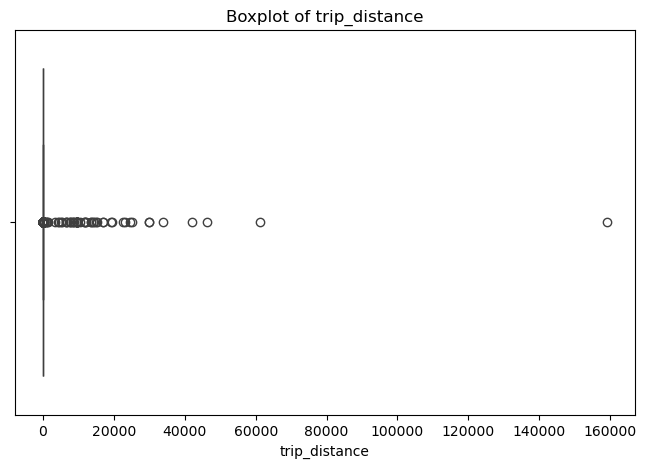

In [498]:
#trip distance outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='trip_distance', data=df)
plt.title('Boxplot of trip_distance')
plt.show()


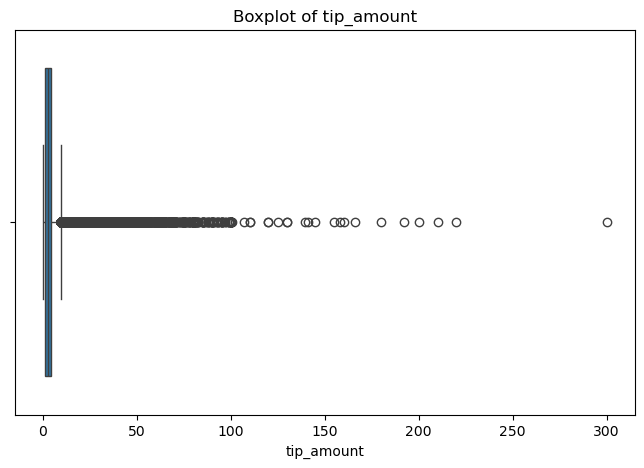

In [502]:
#tip_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x='tip_amount', data=df)
plt.title('Boxplot of tip_amount')
plt.show()

In [43]:
#zero distance fare
zero_distance_fare_df = df[(df['fare_amount'] > 0) & (df['trip_distance'] == 0)]
print(zero_distance_fare_df.shape)

(36376, 20)


In [45]:
#  passenger more than 6
high_passenger_df = df[df['passenger_count'] > 6]
print(high_passenger_df.shape)

(12, 20)


In [47]:
#pickup and dropoff time same
same_datetime_df = df[df['tpep_pickup_datetime'] == df['tpep_dropoff_datetime']]
print(same_datetime_df.shape)

(652, 20)


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [49]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(df.shape)

(1896387, 20)


In [51]:
# Continue with outlier handling
# Invalid trips
df = df[~((df['fare_amount'] > 0) & (df['trip_distance'] == 0))]
print(df.shape)


(1860019, 20)


In [53]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'].between(0, 0.001)) & (df['fare_amount'] >= 300))]
df = df.reset_index(drop=True)
print(df.shape)

(1860019, 20)


In [55]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
trip_distance_zero_df = df[(df['trip_distance'] == 0) & 
                                 (df['fare_amount'] == 0) & 
                                 (df['PULocationID'] != df['DOLocationID'])]

print(trip_distance_zero_df.shape)

(74, 20)


In [57]:
#Remove/Drop the above rows
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]

# Reset index after dropping rows
df = df.reset_index(drop=True)
print(df.shape)

(1859945, 20)


In [59]:
#Entries where trip_distance is more than 250 miles.
#df['trip_distance'].value_counts()
trip_distance_high = df[df['trip_distance'] > 250]

print(trip_distance_high.shape)


(43, 20)


In [61]:
#Remove/Drop the above rows
df = df[df['trip_distance'] <= 250]
df = df.reset_index(drop=True)
print(df.shape)

(1859902, 20)


In [63]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
invalid_payment_type = df[df['payment_type'] == 0]

print(invalid_payment_type.shape)

(50586, 20)


In [65]:
#df['payment_type'].value_counts()
# replace with mod
payment_type_mode=df['payment_type'].mode()[0]
df.loc[df['payment_type'] == 0, 'payment_type'] = payment_type_mode
df['payment_type'].value_counts()

payment_type
1    1530880
2     309704
4      12466
3       6852
Name: count, dtype: int64

In [67]:
# Replace passenger_count having 0 value with mode
passenger_count_mode = df['passenger_count'].mode()[0]

# Replace 0 with mode
df.loc[df['passenger_count'] == 0, 'passenger_count'] = passenger_count_mode

print(df['passenger_count'].value_counts())

passenger_count
1.0    1439856
2.0     274397
3.0      68102
4.0      38012
5.0      23806
6.0      15729
Name: count, dtype: int64


In [69]:
#Calculate trip_duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Do any columns need standardising?
## Yes, trip_distance can be standarised. For example, is the trip short? a far trip distance define the fare_amount high


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

### VendorID = categoriccal
### tpep_pickup_datetime = numerical
### tpep_dropoff_datetime = numerical
### passenger_count = categoriccal
### trip_distance - numerical
### RatecodeID - categorical
### PULocationID - numerical
### DOLocationID - numerical
### payment_type - categorical
### pickup_hour - numerical as well as can be used as categorical(Morning, Day & Night) column.
### trip_duration - numerical



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

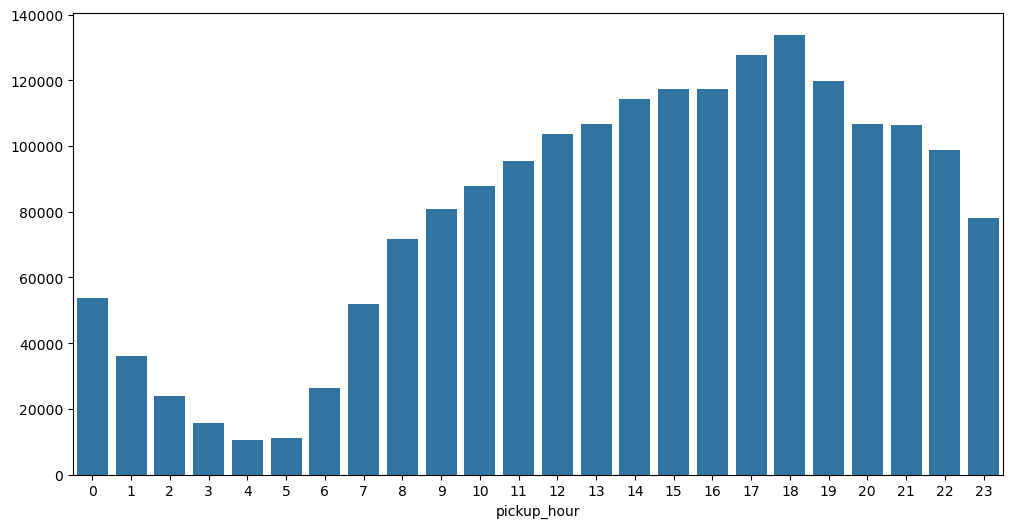

In [514]:
# Find and show the hourly trends in taxi pickups
#df.info()
#group_by_hourly = df.groupby('pickup_hour')['pickup_date'].count()
#df.head()
#df['pickup_hour'].value_counts()
#sns.boxplot(y=df['pickup_hour'])
#plt.show()
#sns.histplot(x=df['pickup_hour'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#plt.show()
hourly_distribution = df['pickup_hour'].value_counts().sort_index()
hourly_distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_distribution.index, y=hourly_distribution.values)
plt.show()


### The hourly distribution shows the traffic increases from 4PM to 6PM and than from 7PM pickup density comes down

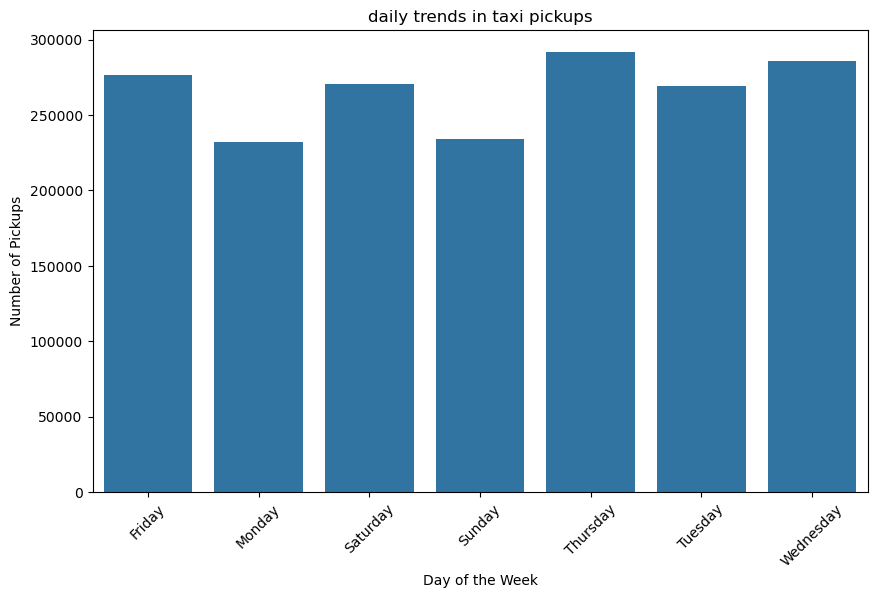

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
#Add day column
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
#print(df[['tpep_pickup_datetime', 'pickup_day']].head())
#groupby pickup_day
#df['daily_pickup_count'] = df.groupby('pickup_day')['tpep_pickup_datetime'].transform('count')

#df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=day_of_the_week, ordered=True)
#daily_pickups = daily_pickups.sort_values('pickup_day')
#print(daily_pickups)

#df['daily_pickup_count'].value_counts()
#df['pickup_count'] = df.groupby(['pickup_day'])['tpep_pickup_datetime'].count()
daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count().reset_index(name='pickup_count')
#not sure how to get predefined list in python
#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=day_order, ordered=True)
#print(df[['pickup_day', 'pickup_count']].head())
#daily_pickups
#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day', y='pickup_count', data=daily_pickups)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('daily trends in taxi pickups')
plt.xticks(rotation=45)
plt.show()

### The trend shows Thursday pickup is highest.

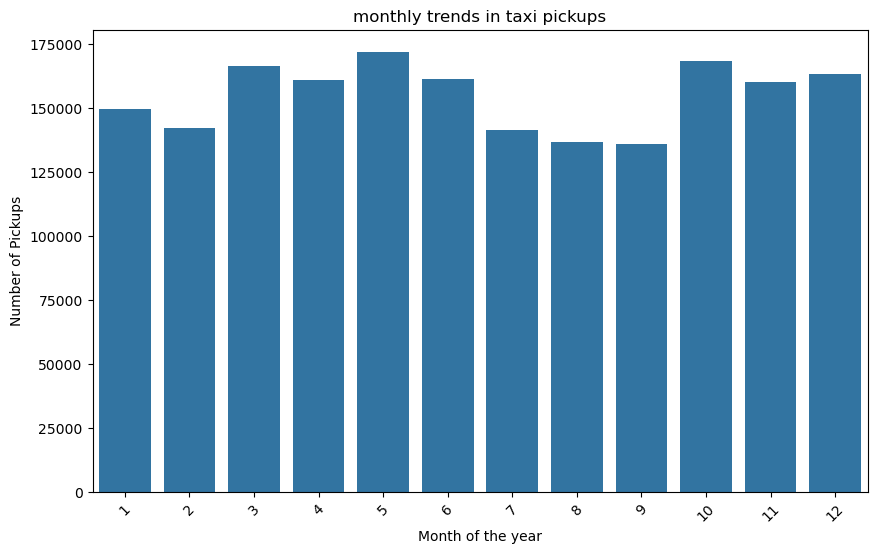

In [77]:
# Show the monthly trends in pickups
#month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
#print(df[['tpep_pickup_datetime', 'pickup_month']].head())
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count().reset_index(name='monthly_pickup_count')
#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month', y='monthly_pickup_count', data=monthly_pickups)
plt.xlabel('Month of the year')
plt.ylabel('Number of Pickups')
plt.title('monthly trends in taxi pickups')
plt.xticks(rotation=45)
plt.show()






### the trip is highest in the 5th month.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [79]:
# Analyse the above parameters
#fare_amount
zero_negative_fare_amount = df[(df['fare_amount'] < 0) | (df['fare_amount'] == 0)]
print(f'zero_negative_fare_amount count: {zero_negative_fare_amount.shape}')
# Yes, fare_amount has 536 count of zero_negative_fare_amount
zero_negative_tip_amount = df[(df['tip_amount'] < 0) | (df['tip_amount'] == 0)]
print(f'zero_negative_tip_amount count: {zero_negative_tip_amount.shape}')
# total_amount
zero_negative_total_amount = df[(df['total_amount'] < 0) | (df['total_amount'] == 0)]
print(f'zero_negative_total_amount count: {zero_negative_total_amount.shape}')
# trip_distance
zero_negative_trip_distance = df[(df['trip_distance'] < 0) | (df['trip_distance'] == 0)]
print(f'zero_negative_trip_distance count: {zero_negative_trip_distance.shape}')

zero_negative_fare_amount count: (560, 23)
zero_negative_tip_amount count: (407264, 23)
zero_negative_total_amount count: (328, 23)
zero_negative_trip_distance count: (266, 23)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [99]:
# Yes, it makes sense to create a copy of DataFrame leaving out the zero values from these


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [101]:
# what if rider cancels the ride. In this case distance could be zero but if ride is cancelled and there is some fare associated to it.

In [81]:
# Create a df with non zero entries for the selected parameters.
non_zero_negative_df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()
print(f'non_zero_negative_df: {non_zero_negative_df.shape}')



non_zero_negative_df: (1859342, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

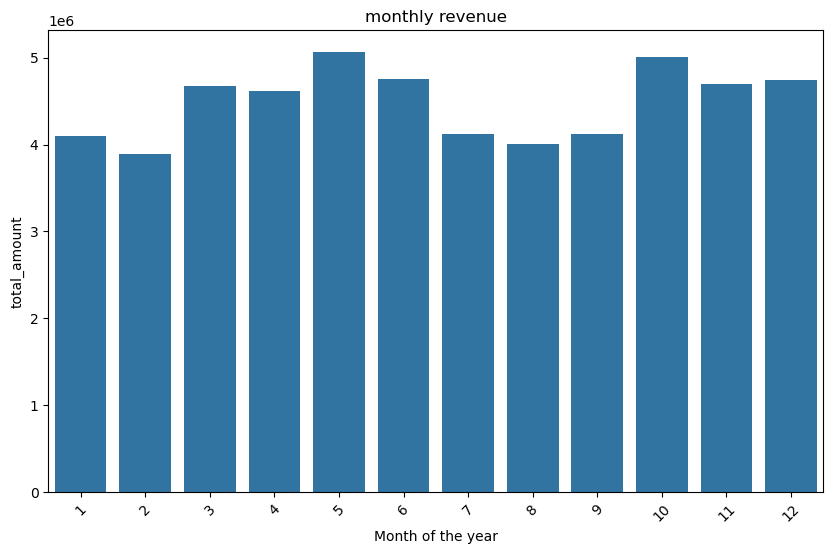

In [83]:
# Group data by month and analyse monthly revenue
#month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
#print(df[['tpep_pickup_datetime', 'pickup_month']].head())
monthly_total_amount = df.groupby('pickup_month')['total_amount'].sum().reset_index(name='monthly_total_revenue')
#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month', y='monthly_total_revenue', data=monthly_total_amount)
plt.xlabel('Month of the year')
plt.ylabel('total_amount')
plt.title('monthly revenue')
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

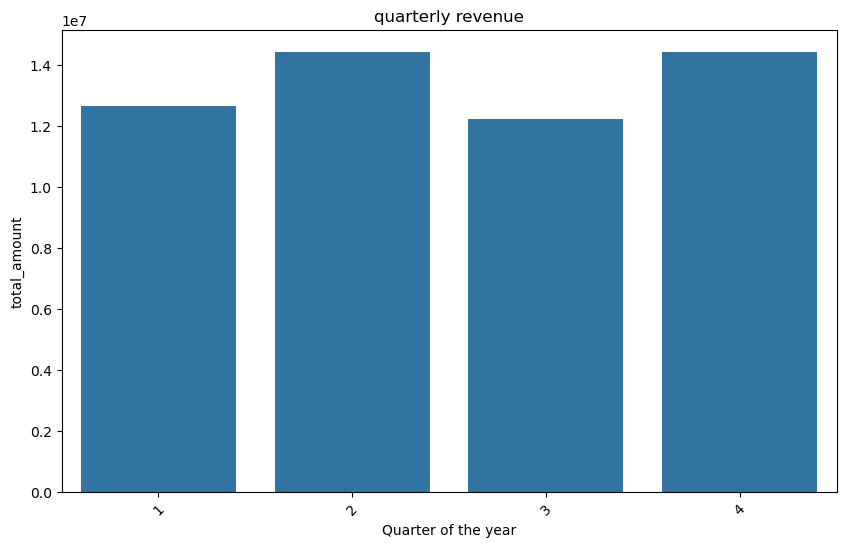

In [85]:
# Calculate proportion of each quarter
#quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
#print(df[['tpep_pickup_datetime', 'pickup_quarter']].head())
quarterly_total_amount = df.groupby('pickup_quarter')['total_amount'].sum().reset_index(name='quarterly_total_revenue')
#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_quarter', y='quarterly_total_revenue', data=quarterly_total_amount)
plt.xlabel('Quarter of the year')
plt.ylabel('total_amount')
plt.title('quarterly revenue')
plt.xticks(rotation=45)
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

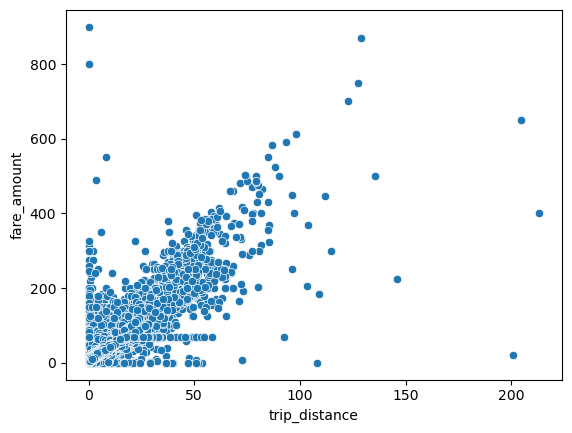

In [88]:
# Show how trip fare is affected by distance
#Relationship between trip distance and fare_amount
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'])
plt.show()


### It is fare_amount is directly proportional to trip_distance and as the distance increases so fare_amount increases.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

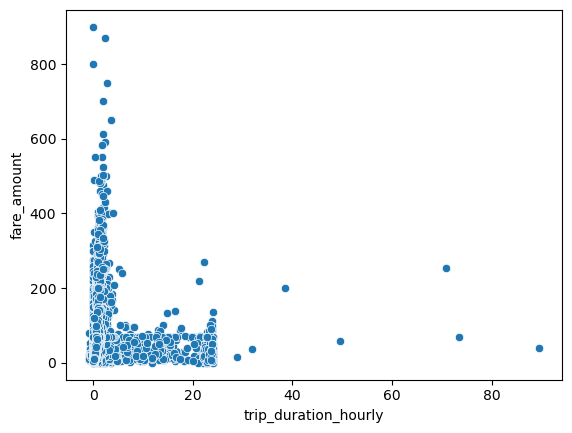

In [103]:
# Show relationship between fare and trip duration
#sns.scatterplot(x=df['trip_duration'], y=df['fare_amount'])
#plt.show()
#df['trip_duration_hourly'] = df['trip_duration'] / 60.0
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_duration_hourly'], y=df['fare_amount'])
plt.show()



### the trip_duration_hourly and fare_amount does not reflect any relation.

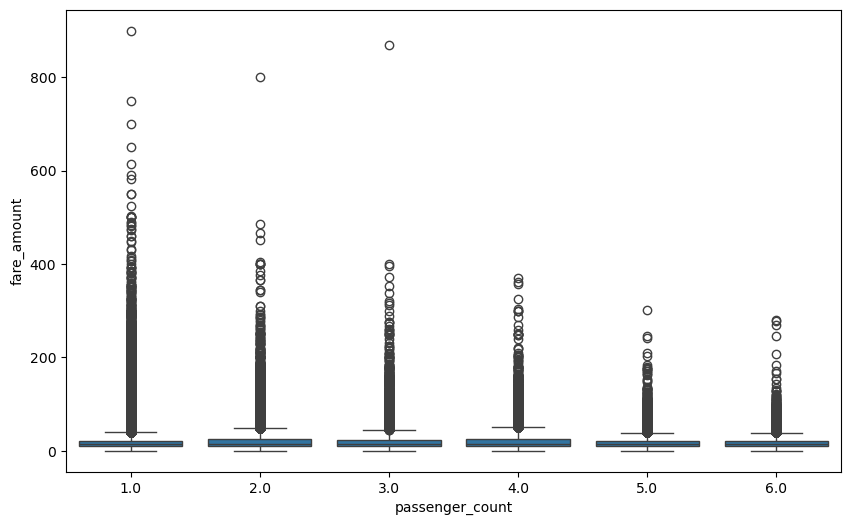

In [113]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'])
plt.show()


### With more passenger fare amount decreases.

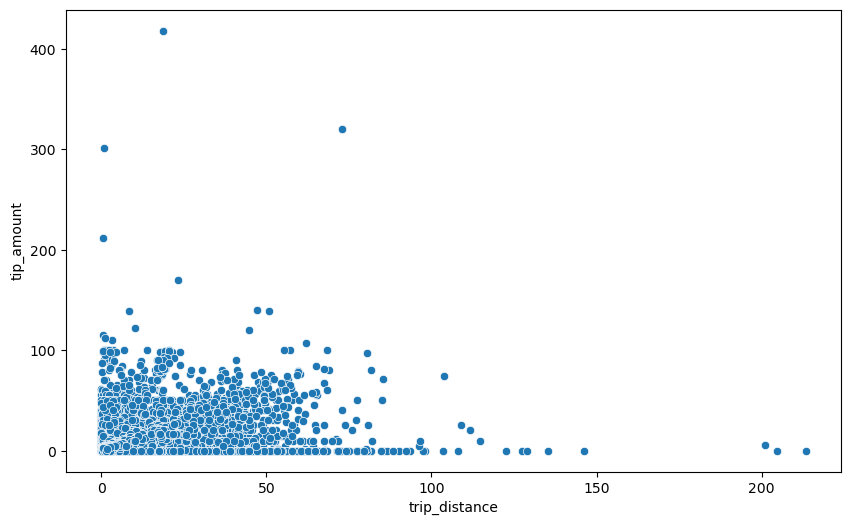

In [122]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['tip_amount'])
plt.show()


### There is no strong relation between trip_distance and tip_amount

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

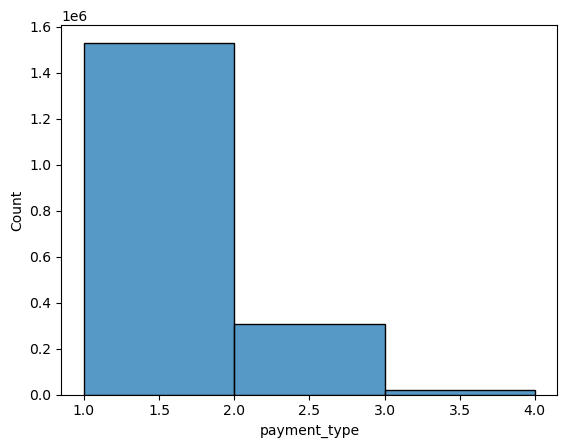

In [129]:
# Analyse the distribution of different payment types (payment_type).

sns.histplot(x=df['payment_type'], bins=[1,2,3,4])
plt.show()



### Credit card payment is high

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [132]:
 import geopandas as gpd

file_path = 'taxi_zones.shp'
# Read the shapefile using geopandas
zones = gpd.read_file(file_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

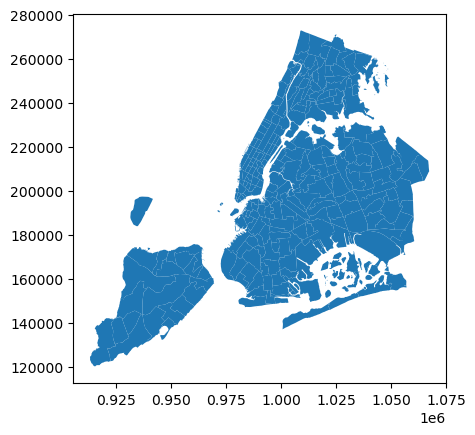

In [134]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [516]:
# Merge zones and trip records using locationID and PULocationID

# Merge zones data using PULocationID
df = df.merge(zones, 
              how='left', 
              left_on='PULocationID', 
              right_on='LocationID', 
              suffixes=('_pickup', '_dropoff'))

# Merge zones data using DOLocationID
df = df.merge(zones, 
              how='left', 
              left_on='DOLocationID', 
              right_on='LocationID', 
              suffixes=('_pickup', '_dropoff'))




In [164]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour',
       'trip_duration', 'pickup_day', 'pickup_month', 'pickup_quarter',
       'trip_duration_hourly', 'OBJECTID_pickup', 'Shape_Leng_pickup',
       'Shape_Area_pickup', 'zone_pickup', 'LocationID_pickup',
       'borough_pickup', 'geometry_pickup', 'OBJECTID_dropoff',
       'Shape_Leng_dropoff', 'Shape_Area_dropoff', 'zone_dropoff',
       'LocationID_dropoff', 'borough_dropoff', 'geometry_dropoff', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [170]:
# Group data by location and calculate the number of trips
zone_pickup_counts = df.groupby('zone_pickup').size().reset_index(name='pickup_trip_count')
zone_pickup_counts


zone_pickup  pickup_trip_count
0    Allerton/Pelham Gardens                 33
1              Alphabet City               2227
2              Arden Heights                 16
3    Arrochar/Fort Wadsworth                 13
4                    Astoria                820
..                       ...                ...
247       Woodlawn/Wakefield                 46
248                 Woodside                340
249       World Trade Center               9625
250           Yorkville East              24948
251           Yorkville West              35297

[252 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [524]:
# Merge trip counts back to the zones GeoDataFrame
zone_pickup_counts = df.groupby('zone_pickup').size().reset_index(name='pickup_trip_count')
zone_dropoff_counts = df.groupby('zone_dropoff').size().reset_index(name='dropoff_trip_count')
zone_trip_counts = pd.merge(zone_pickup_counts, 
                            zone_dropoff_counts, 
                            left_on='zone_pickup', 
                            right_on='zone_dropoff', 
                            how='outer', 
                            suffixes=('_pickup', '_dropoff'))

#df['zone_pickup'].value_counts()

zone_trip_counts.head()

zone_pickup  pickup_trip_count             zone_dropoff  \
0  Allerton/Pelham Gardens               43.0  Allerton/Pelham Gardens   
1            Alphabet City             2357.0            Alphabet City   
2            Arden Heights               19.0            Arden Heights   
3  Arrochar/Fort Wadsworth               17.0  Arrochar/Fort Wadsworth   
4                  Astoria             1018.0                  Astoria   

   dropoff_trip_count  
0               139.0  
1              7232.0  
2                24.0  
3                59.0  
4              5465.0

In [536]:
## 27.1.8.	Add the number of trips for each zone to the zones dataframe
trip_counts_by_zone = df.groupby('PULocationID').size().reset_index(name='trip_count')
#trip_counts_by_zone
trip_counts_by_zone.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zones = zones.merge(trip_counts_by_zone, how='left', on='LocationID')
zones.sort_values(by='trip_count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
83         84    0.233624    0.002074   
102       103    0.014306    0.000006   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   
109       110    0.103946    0.000526   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
83               Eltingville/Annadale/Prince's Bay          84  Staten Island   
102  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   

                                              geometry  trip_count_x  \
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...       97768.0   
236  POLYGON ((993633.442 216961.016, 993507.232 21...       89132.0   
160  POLYGON ((991081.026 214453.698, 990952.644 21...       87474.0   
235  POLYGON ((995940.048 221122.92, 995812.322 220...       79025.0   
161  POLYGON ((992224.354 214415.293, 992096.999 21...       66736.0   
..                                                 ...           ...   
83   POLYGON ((939754.454 131548.91, 939802.804 131...           NaN   
102  POLYGON ((972079.575 190732.429, 972184.766 19...           NaN   
103  POLYGON ((973172.666 194632.348, 973310.63 194...           NaN   
104  POLYGON ((979605.759 191880.575, 979978.435 19...           NaN   
109  POLYGON ((951420.092 139894.411, 951856.209 13...           NaN   

     trip_count_y  trip_count  
131       97768.0     97768.0  
236       89132.0     89132.0  
160       87474.0     87474.0  
235       79025.0     79025.0  
161       66736.0     66736.0  
..            ...         ...  
83            NaN         NaN  
102           NaN         NaN  
103           NaN         NaN  
104           NaN         NaN  
109           NaN         NaN  

[263 rows x 10 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

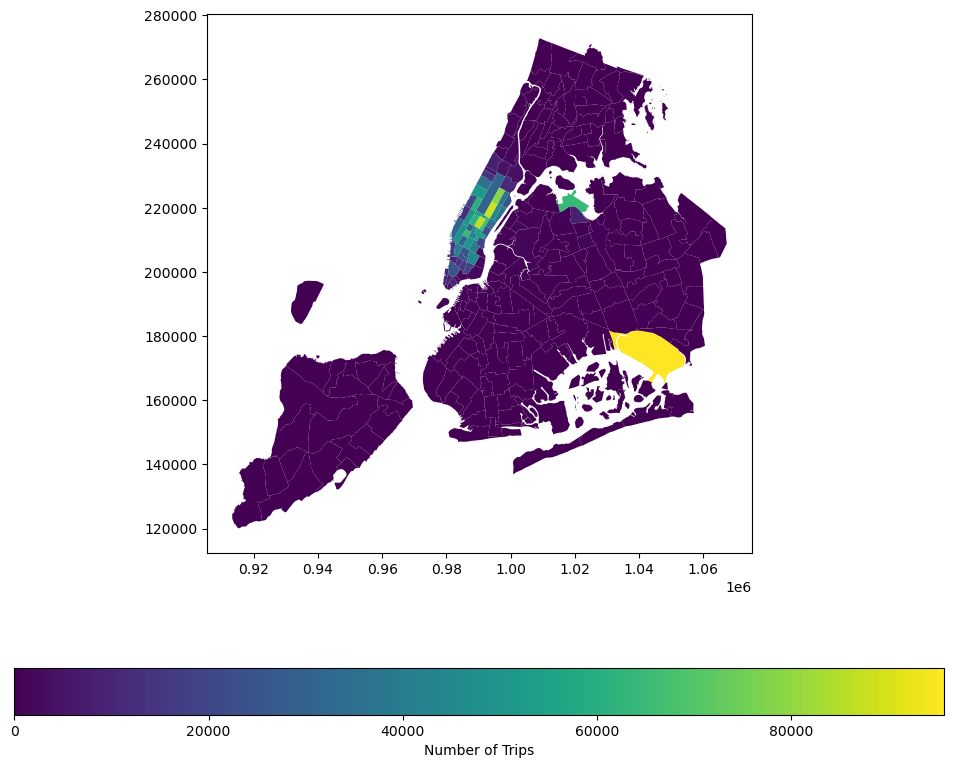

In [232]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

#zones_trip = zones.merge(df, how='left', left_on='LocationID', right_on='PULocationID')
#zones_trip['trip_count'] = zones_trip_gdf['trip_count'].fillna(0)
#df.plot(column='zone_pickup', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
#plt.show()
#Find trip count by PULocationID
trip_counts_df = df.groupby('PULocationID').size().reset_index(name='trip_count')
#print(trip_counts_df.head())
zones_trip = zones.merge(
    trip_counts_df,
    how='left',
    left_on='LocationID', 
    right_on='PULocationID'  
)
zones_trip['trip_count'] = zones_trip['trip_count'].fillna(0)
#print(zones_trip)
zones_trip.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()

In [240]:
# can you try displaying the zones DF sorted by the number of trips?
# here its not mentioned asc or desc - going with desc approach
zones_trip_sorted = zones_trip.sort_values(by='trip_count', ascending=False)
zones_trip_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  trip_count  
131         132.0     95815.0  
236         237.0     88558.0  
160         161.0     86359.0  
235         236.0     79157.0  
161         162.0     66578.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [268]:
# Find routes which have the slowest speeds at different times of the day
#print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration','pickup_hour']].tail())
#df.columns
#find avg_time taken from pickup_loc to drop_loc in hourly distribution
avg_trip_duration = df.groupby(['zone_pickup', 'zone_dropoff', 'pickup_hour'])['trip_duration'].mean().reset_index()
#avg_trip_duration
#find avg_speed with unique records
avg_speed = pd.merge(df[['zone_pickup', 'zone_dropoff', 'pickup_hour', 'trip_distance']].drop_duplicates(),
                        avg_trip_duration, on=['zone_pickup', 'zone_dropoff', 'pickup_hour'])
#avg_speed
avg_speed['average_speed'] = avg_speed['trip_distance'] / avg_speed['trip_duration']
#avg_speed_sort = avg_speed.sort_values(by='average_speed')
#avg_speed_sort.head()
avg_speed_gt_thn_zero = avg_speed[avg_speed['average_speed'] > 0]
avg_speed_sort = avg_speed_gt_thn_zero.sort_values(by='average_speed')
# The below records shows top 5 slow routes.
avg_speed_sort.head()

zone_pickup                      zone_dropoff  \
170565                         Bellerose                         Bellerose   
298334           Queensbridge/Ravenswood           Queensbridge/Ravenswood   
378774           Queensbridge/Ravenswood           Queensbridge/Ravenswood   
436559  Saint Michaels Cemetery/Woodside  Saint Michaels Cemetery/Woodside   
491581           Queensbridge/Ravenswood           Queensbridge/Ravenswood   

        pickup_hour  trip_distance  trip_duration  average_speed  
170565            9           0.01      99.033333       0.000101  
298334           21           0.02     165.701852       0.000121  
378774           11           0.01      66.453205       0.000150  
436559           10           0.02     131.762500       0.000152  
491581           12           0.02     131.016667       0.000153

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

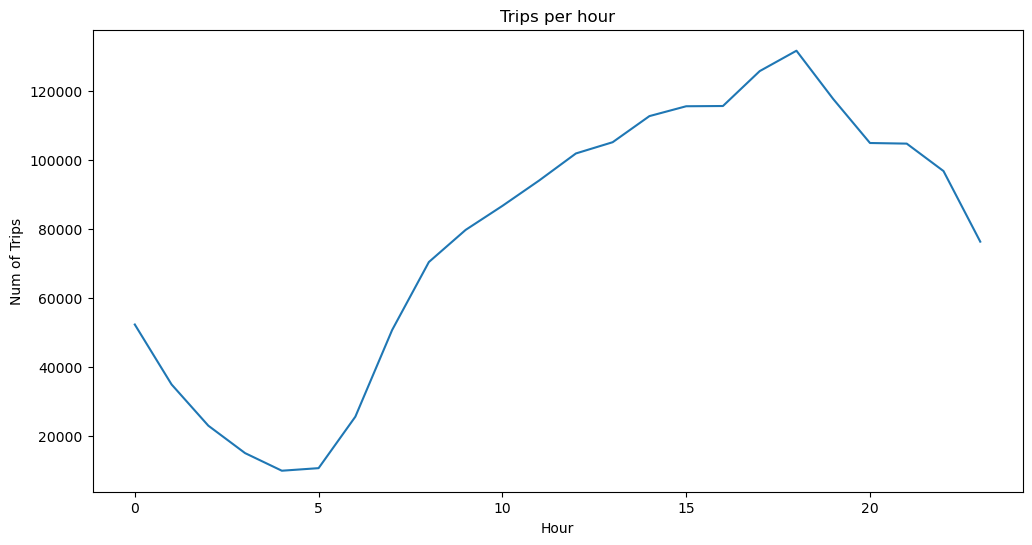

In [276]:
# Visualise the number of trips per hour and find the busiest hour
df.columns
hourly_trips = df['pickup_hour'].value_counts().sort_index()
#hourly_trips
plt.figure(figsize=(12,6))
plt.plot(hourly_trips.index, hourly_trips.values)
plt.xlabel('Hour')
plt.ylabel('Num of Trips')
plt.title('Trips per hour')
plt.show()

In [286]:
#busiest hour
busiest_hour = hourly_trips.idxmax()
#busiest_hour - the answer is 18

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [288]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
zones_trip_sorted['actual_trip_count'] = zones_trip_sorted['trip_count'] / sample_fraction
zones_trip_sorted

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
250       251    0.137711    0.000626   
103       104    0.021221    0.000012   
109       110    0.103946    0.000526   
98         99    0.183371    0.001210   
104       105    0.077425    0.000369   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
250                                    Westerleigh         251  Staten Island   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   
98                                 Freshkills Park          99  Staten Island   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   

                                              geometry  PULocationID  \
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...         132.0   
236  POLYGON ((993633.442 216961.016, 993507.232 21...         237.0   
160  POLYGON ((991081.026 214453.698, 990952.644 21...         161.0   
235  POLYGON ((995940.048 221122.92, 995812.322 220...         236.0   
161  POLYGON ((992224.354 214415.293, 992096.999 21...         162.0   
..                                                 ...           ...   
250  POLYGON ((947868.004 169247.734, 948000.981 16...           NaN   
103  POLYGON ((973172.666 194632.348, 973310.63 194...           NaN   
109  POLYGON ((951420.092 139894.411, 951856.209 13...           NaN   
98   POLYGON ((937468.341 152998.406, 937320.263 15...           NaN   
104  POLYGON ((979605.759 191880.575, 979978.435 19...           NaN   

     trip_count  actual_trip_count  
131     95815.0          1916300.0  
236     88558.0          1771160.0  
160     86359.0          1727180.0  
235     79157.0          1583140.0  
161     66578.0          1331560.0  
..          ...                ...  
250         0.0                0.0  
103         0.0                0.0  
109         0.0                0.0  
98          0.0                0.0  
104         0.0                0.0  

[263 rows x 10 columns]

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

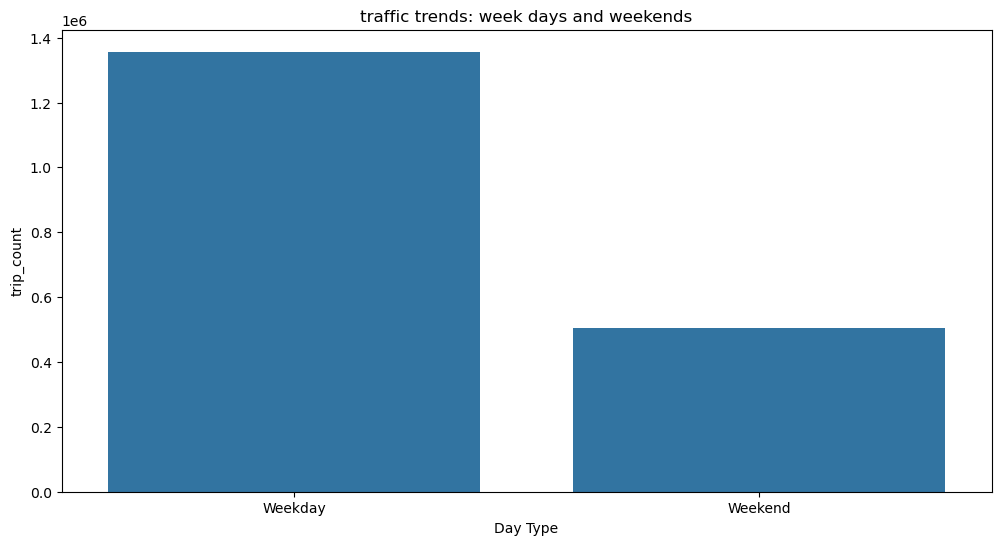

In [304]:
# Compare traffic trends for the week days and weekends
#df.columns
#df['pickup_day'] = this has weekday
#add categorical column to identify record as weekday or weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

#df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')
#df.head()
#group by day_type
traffic_trends = df.groupby('day_type')['trip_distance'].count().reset_index(name='trip_count')

#traffic_trends - Ans: Weekdays has more traffic in comparison to weekends - as taxi covers more distance than weekends
#EDA
plt.figure(figsize=(12,6))
sns.barplot(x='day_type', y='trip_count', data=traffic_trends)
plt.title('traffic trends: week days and weekends')
plt.xlabel('Day Type')
plt.ylabel('trip_count')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

### Evening hours are busy hours and morning and late-night hours are quiet hours

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [338]:
# Find top 10 pickup and dropoff zones
# groupby pickup_zone on hourly basis and derive pickup_count
pickup_counts = df.groupby(['zone_pickup', 'pickup_hour']).size().reset_index(name='pickup_count')
#pickup_counts
# groupby zone_pickup on pickup_count and find aggregation and filter with top 10
top_pickup_zones = pickup_counts.groupby('zone_pickup')['pickup_count'].sum().nlargest(10).reset_index()
print(top_pickup_zones)

                    zone_pickup  pickup_count
0                   JFK Airport         95815
1         Upper East Side South         88558
2                Midtown Center         86359
3         Upper East Side North         79157
4                  Midtown East         66578
5             LaGuardia Airport         64391
6  Penn Station/Madison Sq West         64035
7     Times Sq/Theatre District         61805
8           Lincoln Square East         61286
9                   Murray Hill         55191


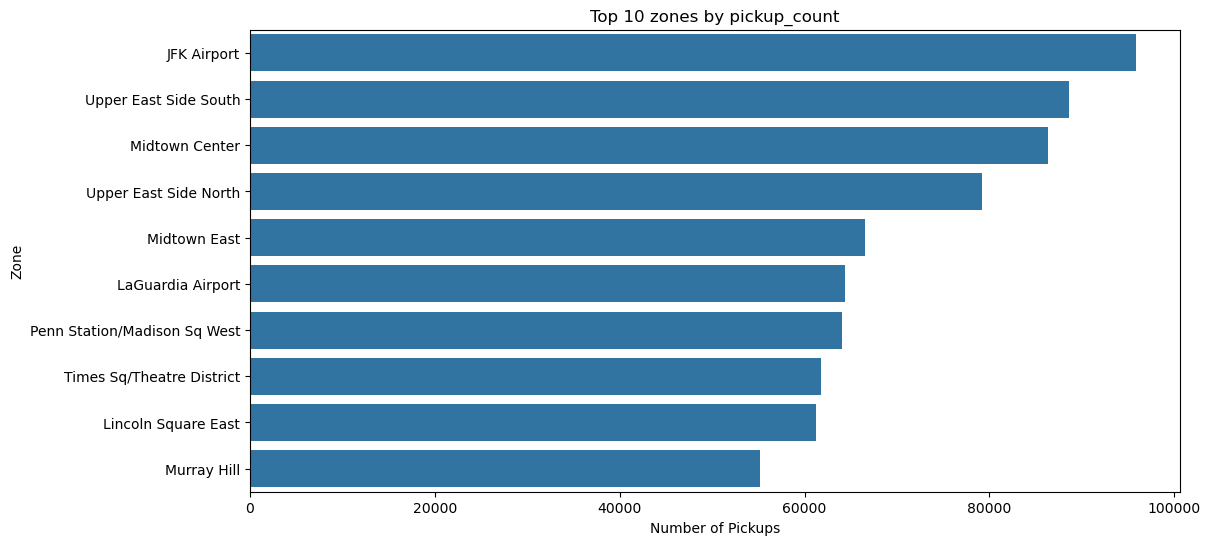

In [540]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_count', y='zone_pickup', data=top_pickup_zones)
plt.title('Top 10 zones by pickup_count')
plt.xlabel('Number of Pickups')
plt.ylabel('Zone')
plt.show()

In [552]:
# top 10 dropoff zones
dropoff_counts = df.groupby(['zone_dropoff', 'pickup_hour']).size().reset_index(name='dropoff_count')
#dropoff_counts
top_dropoff_zones = dropoff_counts.groupby('zone_dropoff')['dropoff_count'].sum().nlargest(10).reset_index()
print(top_dropoff_zones)

                zone_dropoff  dropoff_count
0      Upper East Side North          83590
1      Upper East Side South          79570
2             Midtown Center          73477
3  Times Sq/Theatre District          58604
4                Murray Hill          55679
5               Midtown East          53440
6        Lincoln Square East          52905
7      Upper West Side South          52902
8            Lenox Hill West          49974
9               East Chelsea          47711


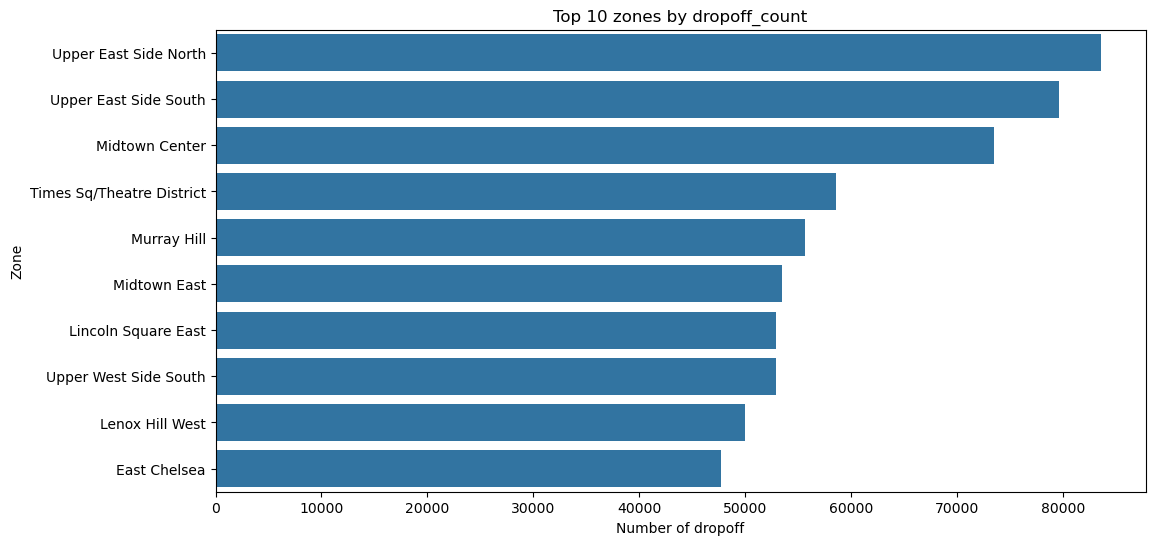

In [554]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_count', y='zone_dropoff', data=top_dropoff_zones)
plt.title('Top 10 zones by dropoff_count')
plt.xlabel('Number of dropoff')
plt.ylabel('Zone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [364]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#df.columns
#groupby pickuplocation and derive pickup_count
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
#pickup_counts
#groupby dropofflocation and derive dropoff_count
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
#dropoff_counts
# Combine
pickup_dropoff_combine = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', suffixes=('_pickup', '_dropoff'))
#pickup_dropoff_combine
# pickup/dropoff ratio
pickup_dropoff_combine['pickup_dropoff_ratio'] = pickup_dropoff_combine['pickup_count'] / pickup_dropoff_combine['dropoff_count']
#ratio of pickups and dropoffs in each zone 
print(pickup_dropoff_combine['pickup_dropoff_ratio'] )



0      0.009277
1      0.750000
2      0.234043
3      0.316021
4      0.666667
         ...   
249    1.079399
250    0.876014
251    0.920823
252    0.958839
253    0.104318
Name: pickup_dropoff_ratio, Length: 254, dtype: float64


PULocationID  pickup_count  DOLocationID  dropoff_count  \
68             70          8301            70            992   
123           132         95815           132          21397   
129           138         64391           138          24003   
176           186         64035           186          40892   
54             56          1488            56           1002   
105           114         24542           114          17851   
41             43         30846            43          22449   
238           249         41570           249          31231   
152           162         66578           162          53180   
96            100         30994           100          25679   

     pickup_dropoff_ratio  
68               8.367944  
123              4.477964  
129              2.682623  
176              1.565954  
54               1.485030  
105              1.374825  
41               1.374048  
238              1.331049  
152              1.251937  
96               1.206978

In [368]:
#find top 10 - sort them in desc
pickup_dropoff_ratio_sort = pickup_dropoff_combine.sort_values(by='pickup_dropoff_ratio', ascending=False)

# top 10
pickup_dropoff_ratio_sort.head(10) 

PULocationID  pickup_count  DOLocationID  dropoff_count  \
68             70          8301            70            992   
123           132         95815           132          21397   
129           138         64391           138          24003   
176           186         64035           186          40892   
54             56          1488            56           1002   
105           114         24542           114          17851   
41             43         30846            43          22449   
238           249         41570           249          31231   
152           162         66578           162          53180   
96            100         30994           100          25679   

     pickup_dropoff_ratio  
68               8.367944  
123              4.477964  
129              2.682623  
176              1.565954  
54               1.485030  
105              1.374825  
41               1.374048  
238              1.331049  
152              1.251937  
96               1.206978

In [366]:
# bottom 10
pickup_dropoff_ratio_sort.tail(10)

PULocationID  pickup_count  DOLocationID  dropoff_count  \
174           184             1           184             18   
245           257            44           257            803   
188           198            54           198            986   
56             58             3            58             57   
102           109             1           109             20   
234           245             1           245             20   
162           172             1           172             21   
106           115             1           115             21   
71             73             7            73            164   
0               1            52             1           5605   

     pickup_dropoff_ratio  
174              0.055556  
245              0.054795  
188              0.054767  
56               0.052632  
102              0.050000  
234              0.050000  
162              0.047619  
106              0.047619  
71               0.042683  
0                0.009277

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [379]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
#night hour between 11pm to 5am
night_hours_11_to_5 = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5 )]
#night_hours_11_to_5
# count night pickups and apply sorting from most to least
night_pickup_counts = (
    night_hours_11_to_5.groupby('PULocationID')
    .size()
    .reset_index(name='night_pickup_count')
    .sort_values(by='night_pickup_count', ascending=False)
)


PULocationID  night_pickup_count
72             79               15984
114           132               14839
223           249               13052
41             48               10471
130           148               10018
..            ...                 ...
135           153                   1
26             30                   1
12             15                   1
219           245                   1
51             58                   1

[239 rows x 2 columns]

In [381]:
# top 10
print(night_pickup_counts.head(10))

     PULocationID  night_pickup_count
72             79               15984
114           132               14839
223           249               13052
41             48               10471
130           148               10018
98            114                8807
205           230                8343
166           186                7038
145           164                6226
61             68                6186


In [385]:
#dropoff night
#df.columns
night_dropoff_counts = (
    night_hours_11_to_5.groupby('DOLocationID')
    .size()
    .reset_index(name='night_dropoff_count')
    .sort_values(by='night_dropoff_count', ascending=False)
)
# top 10
print(night_dropoff_counts.head(10))

     DOLocationID  night_dropoff_count
78             79                 8415
47             48                 7257
164           170                 6518
67             68                 5834
102           107                 5682
135           141                 5457
255           263                 5219
241           249                 5040
222           230                 4749
221           229                 4457


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [387]:
# Filter for night hours (11 PM to 5 AM)

# add cetegorical column - Night/Day
df['period'] = df['pickup_hour'].apply(lambda x: 'Night' if(x >= 23 or x<= 5) else 'Day')
# group by period and aggregate the total_amount
revenue_by_period = df.groupby('period')['total_amount'].sum().reset_index(name='total_revenue')
print(revenue_by_period)
#Day time revenue is more and its obvoius as in night has 1/4th of the total hrs


period  total_revenue
0    Day    47298159.70
1  Night     6575084.84

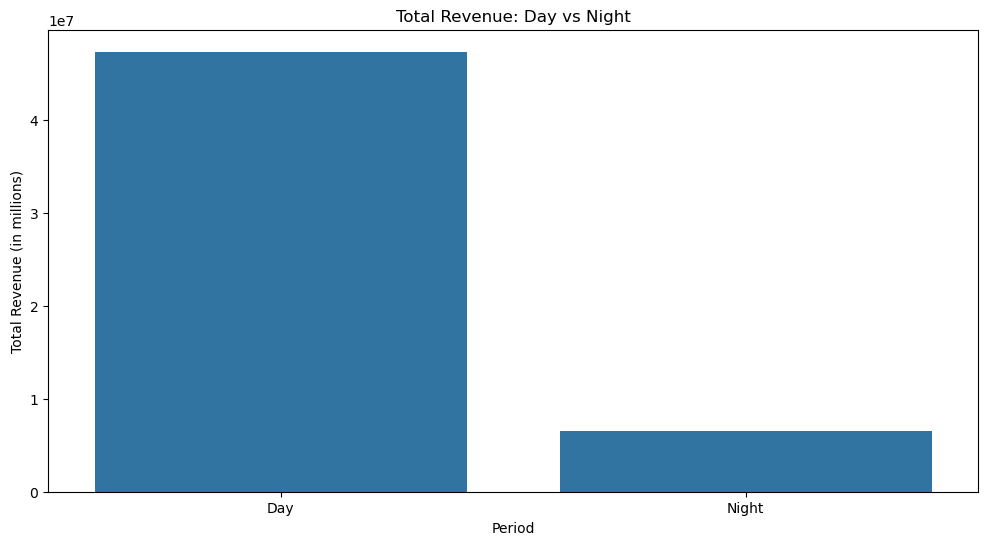

In [558]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='total_revenue', data=revenue_by_period)
plt.title('Total Revenue: Day vs Night')
plt.xlabel('Period')
plt.ylabel('Total Revenue (in millions)')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [392]:
# Analyse the fare per mile per passenger for different passenger counts

# find fare per mile
df['fare_per_mile'] = df.apply(
    lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] > 0 else 0,
    axis=1
)
#df['fare_per_mile']
#groupby passenger_count
avg_fare_per_mile = df.groupby('passenger_count')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')
print(avg_fare_per_mile)
#there is no trend that as the passenger increases than fare per mile should increase or decrease.
#Actually, its increasing till 4 passenger_count and than sudden decrease.


passenger_count  avg_fare_per_mile
0              1.0          10.625765
1              2.0          13.167010
2              3.0          12.837773
3              4.0          17.637236
4              5.0           8.892610
5              6.0           8.774538

Text(0, 0.5, 'Average Fare per Mile')

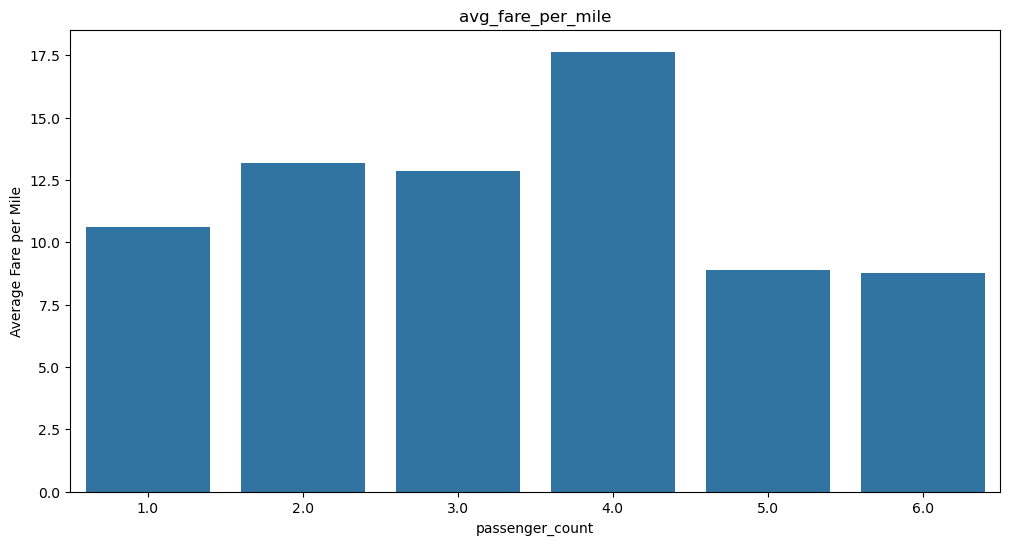

In [560]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='avg_fare_per_mile', data=avg_fare_per_mile)
plt.title('avg_fare_per_mile')
plt.xlabel('passenger_count')
plt.ylabel('Average Fare per Mile')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
# this question is not clear - for different times of the day???

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [400]:
# Compare fare per mile for different vendors
#df.columns
#df['VendorID'].value_counts()
avg_fare_per_mile_vendor = df.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')
print(avg_fare_per_mile_vendor)
# Vendor 2 has high avg_fare_per_mile

   VendorID  avg_fare_per_mile
0         1           8.124076
1         2          12.256678
2         6           6.223501


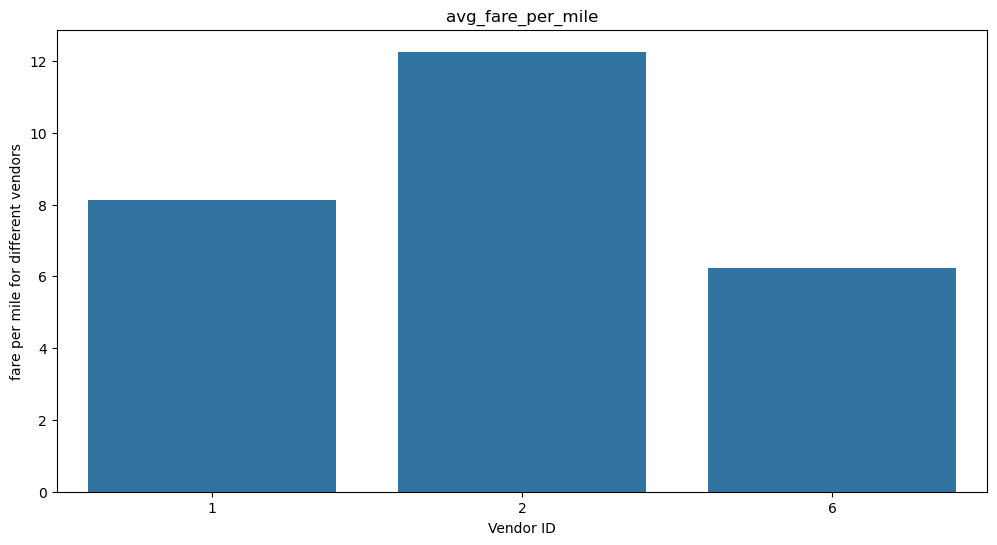

In [562]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='VendorID', y='avg_fare_per_mile', data=avg_fare_per_mile_vendor)
plt.title('avg_fare_per_mile')
plt.xlabel('Vendor ID')
plt.ylabel('fare per mile for different vendors')

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [408]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
#find tip percentage
df['tip_percentage'] = df.apply(
    lambda x: (x['tip_amount'] / x['fare_amount']) * 100 if x['fare_amount'] > 0 else 0,
    axis=1
)
#df['tip_percentage']
#Lets divide trip_distance as short, medium, long distance
distance_bins = [0, 10, 20, float('inf')]
distance_labels = ['Short Trip', 'Medium Trip', 'Long Trip']
#create categorical column
df['distance_category'] = pd.cut(df['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)
print(df['distance_category'].value_counts()) 
#now find tips based on distance_category
avg_tip_distance_category = df.groupby('distance_category')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
print(avg_tip_distance_category)
#Long trip generates more tips and medium trip shows less tips.

distance_category
Short Trip     1696571
Medium Trip     144128
Long Trip        21069
Name: count, dtype: int64
  distance_category  avg_tip_percentage
0        Short Trip           20.699883
1       Medium Trip           15.978220
2         Long Trip           80.732972


C:\Users\yoges\AppData\Local\Temp\ipykernel_80332\2319604867.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_distance_category = df.groupby('distance_category')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')


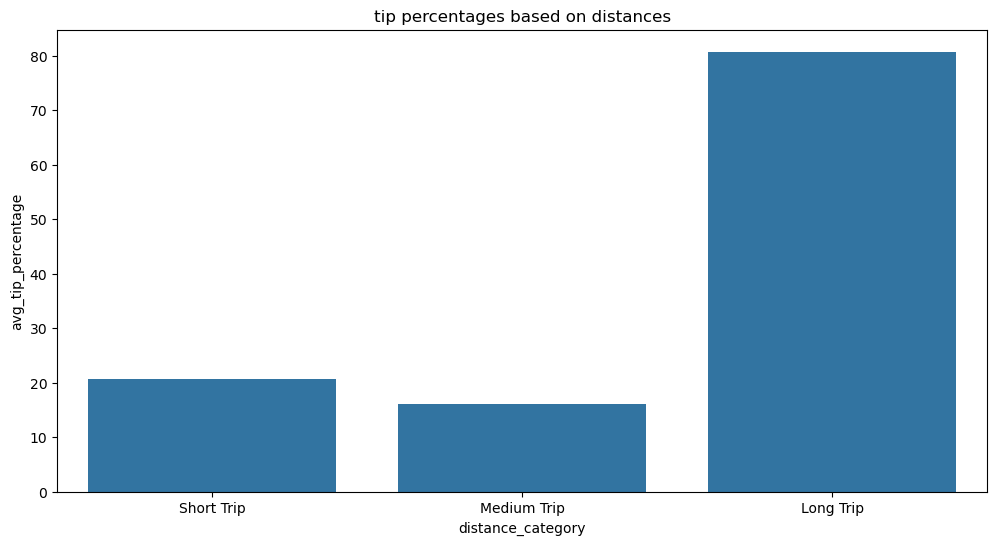

In [564]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_category', y='avg_tip_percentage', data=avg_tip_distance_category)
plt.title('tip percentages based on distances')
plt.xlabel('distance_category')
plt.ylabel('avg_tip_percentage')
plt.show()

In [410]:
#tips by num of passenger
avg_tip_passenger = df.groupby('passenger_count')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
print(avg_tip_passenger)
# no trend its constant. irrespective of passenger count tip_percentage remains same.

   passenger_count  avg_tip_percentage
0              1.0           21.457605
1              2.0           19.775193
2              3.0           19.014083
3              4.0           17.281828
4              5.0           20.572462
5              6.0           20.323904


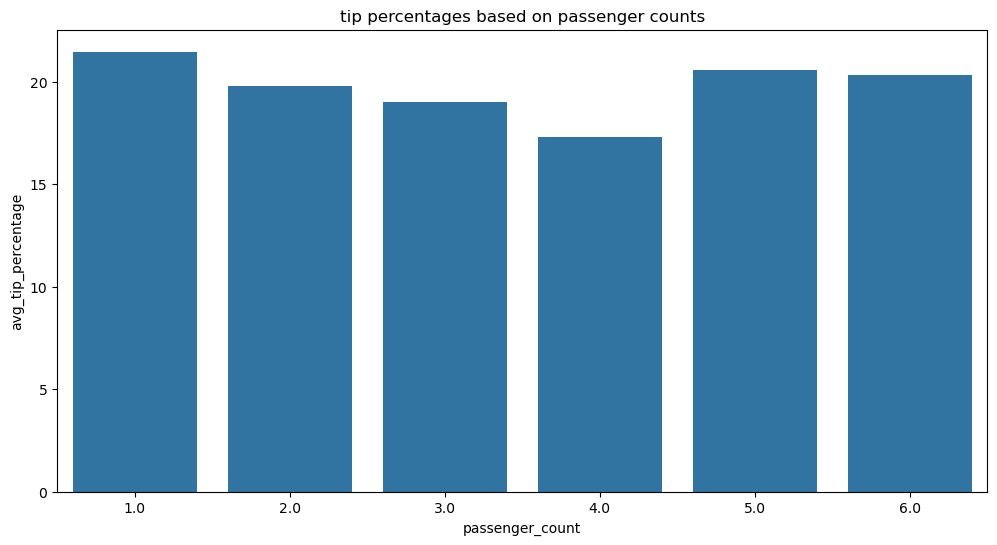

In [566]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='avg_tip_percentage', data=avg_tip_passenger)
plt.title('tip percentages based on passenger counts')
plt.xlabel('passenger_count')
plt.ylabel('avg_tip_percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [412]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
#lets divide the tips as low tip, avg tip and high tip.
tips_bins = [0, 10, 25, float('inf')]
tips_labels = ['low tip', 'avg tip', 'high tip']
df['tip_category'] = pd.cut(df['tip_percentage'], 
                             bins=tips_bins, 
                             labels=tips_labels, 
                             right=False)

low_tip = df[df['tip_category'] == 'low tip']
high_tip = df[df['tip_category'] == 'high tip']

# Check the number of trips in each category
print(df['tip_category'].value_counts())
# high tip is more.

tip_category
high tip    828386
avg tip     545533
low tip     487849
Name: count, dtype: int64


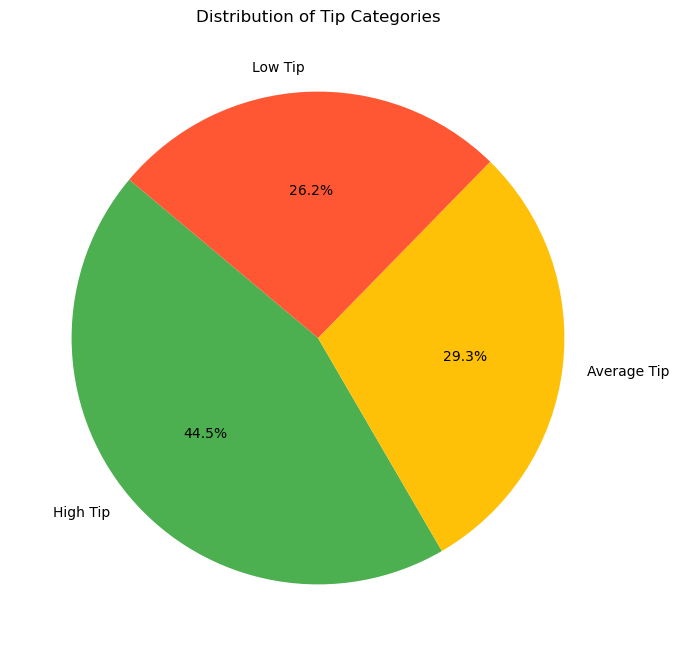

In [568]:
#pie-chart
plt.figure(figsize=(8, 8))
labels = ['High Tip', 'Average Tip', 'Low Tip']
values = [828386, 545533, 487849]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107', '#FF5733'])
plt.title('Distribution of Tip Categories')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [424]:
# See how passenger count varies across hours and days
#df.columns
#df['pickup_day']
psg_count_on_hourly_basis = df.groupby('pickup_hour')['passenger_count'].mean().reset_index(name='psg_count_per_hr')
print(psg_count_on_hourly_basiso)



pickup_hour  psg_count_per_hr
0             0          1.407969
1             1          1.424768
2             2          1.422330
3             3          1.421817
4             4          1.361824
5             5          1.273287
6             6          1.246343
7             7          1.272552
8             8          1.282499
9             9          1.303840
10           10          1.341217
11           11          1.360218
12           12          1.374152
13           13          1.381361
14           14          1.388220
15           15          1.398425
16           16          1.397789
17           17          1.381602
18           18          1.372976
19           19          1.386391
20           20          1.396821
21           21          1.411534
22           22          1.416295
23           23          1.405925

In [428]:
#days
#df['pickup_day']
psg_count_day = df.groupby('pickup_day')['passenger_count'].mean().reset_index(name='psg_count_per_day')
print(psg_count_day)

  pickup_day  psg_count_per_day
0     Friday           1.386685
1     Monday           1.353910
2   Saturday           1.466886
3     Sunday           1.450464
4   Thursday           1.334271
5    Tuesday           1.324862
6  Wednesday           1.323703


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [434]:
# How does passenger count vary across zones
#df.columns
df['zone']
psg_count_zone = df.groupby('zone')['passenger_count'].mean().reset_index(name='psg_count_per_zone')
print(psg_count_zone)


                        zone  psg_count_per_zone
0    Allerton/Pelham Gardens            1.319149
1              Alphabet City            1.349652
2              Arden Heights            1.125000
3    Arrochar/Fort Wadsworth            1.468085
4                    Astoria            1.304283
..                       ...                 ...
251       Woodlawn/Wakefield            1.334842
252                 Woodside            1.345107
253       World Trade Center            1.466188
254           Yorkville East            1.329295
255           Yorkville West            1.344125

[256 rows x 2 columns]


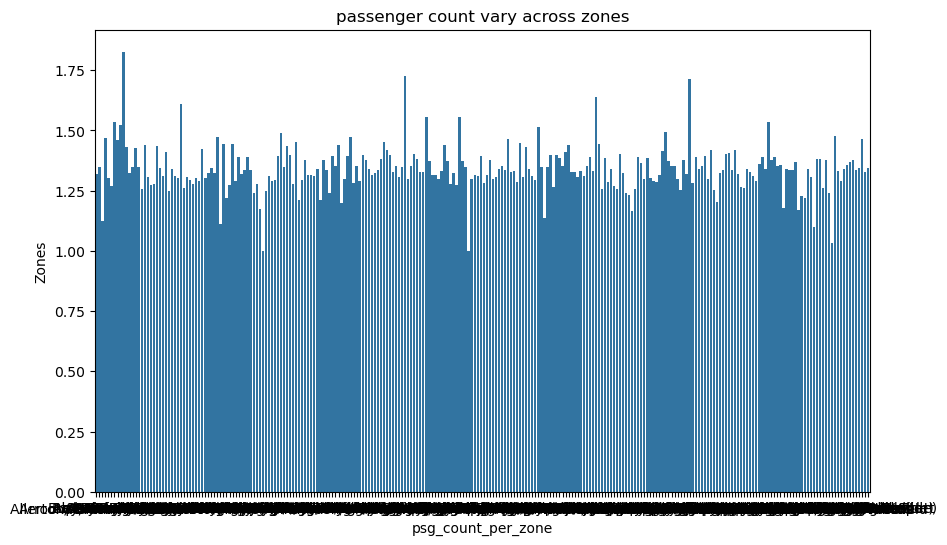

In [576]:
#bar-chart
plt.figure(figsize=(10, 6))
sns.barplot(x='zone', y='psg_count_per_zone', data=psg_count_zone)
plt.xlabel('psg_count_per_zone')
plt.ylabel('Zones')
plt.title('passenger count vary across zones')
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [448]:
# How often is each surcharge applied?
#df.columns
#groupby location to find total extra charges including mta_tax, congestion, airport
zone_extra_charges = df.groupby(['PULocationID', 'DOLocationID'])[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']].sum().reset_index()
#sum and introduce new column to represent totoal extra charge
zone_extra_charges['total_extra_charges'] = zone_extra_charges[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']].sum(axis=1)
#zone_extra_charges

top_extra_charge_zones = top_extra_charge_zones.merge(zones[['LocationID', 'zone']], 
                                                      left_on='PULocationID', 
                                                      right_on='LocationID', 
                                                      how='left').rename(columns={'zone': 'pickup_zone'})
#top_extra_charge_zones
top_extra_charge_zones = zone_extra_charges.sort_values('total_extra_charges', ascending=False)
top_extra_charge_zones.head(10)

PULocationID  DOLocationID     extra  mta_tax  congestion_surcharge  \
17735           237           236  17920.50   6443.8               32207.5   
17535           236           237  14928.00   5493.5               27462.5   
20093           264           264  12279.50   6246.5               23477.5   
9517            138           230  24716.00   1939.5                9707.5   
17736           237           237  11995.78   4261.0               21302.5   
17534           236           236  11054.50   4111.5               20530.0   
8907            132           230   8835.50   2204.6               11055.0   
11797           161           237   9158.00   3042.3               15210.0   
9451            138           161  15507.75   1220.5                6097.5   
17680           237           161   6901.50   2865.0               14337.5   

       airport_fee  total_extra_charges  
17735         1.25             56573.05  
17535         0.00             47884.00  
20093       643.25             42646.75  
9517       6228.75             42591.75  
17736         1.75             37561.03  
17534         3.75             35699.75  
8907       6854.50             28949.60  
11797         0.00             27410.30  
9451       3946.50             26772.25  
17680         1.75             24105.75

In [450]:
#time basis
#hourly basis diff charges
hourly_extra_charges = df.groupby('pickup_hour')[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']].sum().reset_index()
print(hourly_extra_charges)


pickup_hour      extra   mta_tax  congestion_surcharge  airport_fee
0             0   86013.42  26033.60             119160.00      9199.50
1             1   53477.35  17383.50              81757.50      3555.50
2             2   34984.55  11437.80              54765.00      1221.75
3             3   23019.23   7435.50              35710.00       590.25
4             4   16380.65   4838.00              22382.50       524.50
5             5   18503.00   5180.65              22012.50      1836.00
6             6   23197.45  12614.60              54740.00      4954.00
7             7   44111.50  25142.00             115190.00      6179.50
8             8   61792.75  34981.95             162872.50      7440.75
9             9   75665.50  39594.20             185860.00      9299.50
10           10   83232.27  43032.70             202162.50     10728.75
11           11   87508.02  46683.80             220682.50     10576.00
12           12   94800.50  50535.40             238850.00     12154.50
13           13   99337.25  52108.50             245600.00     14143.50
14           14  108052.03  55771.45             261947.50     17282.25
15           15  109845.03  57259.80             268307.50     17588.25
16           16  305909.54  57342.10             268620.00     18222.70
17           17  336177.75  62479.80             294625.00     17107.75
18           18  349684.35  65487.65             310330.00     15775.00
19           19  309116.00  58582.70             276380.00     16514.25
20           20  187353.77  52241.55             245035.75     16728.50
21           21  179569.49  52197.40             245010.00     16213.00
22           22  161877.13  48223.75             224557.50     16175.25
23           23  132934.99  38004.55             172851.00     16514.25

In [452]:
#hourly basis sum of all charges
# Calculate total extra charges per hour
hourly_extra_charges['total_extra_charges'] = hourly_extra_charges[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']].sum(axis=1)
print(hourly_extra_charges)

    pickup_hour      extra   mta_tax  congestion_surcharge  airport_fee  \
0             0   86013.42  26033.60             119160.00      9199.50   
1             1   53477.35  17383.50              81757.50      3555.50   
2             2   34984.55  11437.80              54765.00      1221.75   
3             3   23019.23   7435.50              35710.00       590.25   
4             4   16380.65   4838.00              22382.50       524.50   
5             5   18503.00   5180.65              22012.50      1836.00   
6             6   23197.45  12614.60              54740.00      4954.00   
7             7   44111.50  25142.00             115190.00      6179.50   
8             8   61792.75  34981.95             162872.50      7440.75   
9             9   75665.50  39594.20             185860.00      9299.50   
10           10   83232.27  43032.70             202162.50     10728.75   
11           11   87508.02  46683.80             220682.50     10576.00   
12           12   94800.5

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Increase in cab supply for high demand zones so that passenger does not need to wait for long.
### pickup and dropoff pickup count is more for airport regions. This taxi company should provide 24*7 services.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### During peak hours total amount including fare and other extra charges is more. This time can be utilized to be in demand and extra charge can have 10 to 15% more than usual.
### During night hours fare can be 20% more than usual.
### Offer some discount to attract customers in low demanding zones.